#                         WARSAW WEATHER IN YEARS 2005-2020
---

#### I would like to show you how the climate has changed over 15 years in the capital of Poland, Warsaw.
#### The data was collected from website https://www.wunderground.com/ by my own bot(scraper) with selenium python module help. I have placed its file in the respository.


---
Let's load the data and see what we have to deal with!
---
First of all I will do some quick analisys to get to know  better with data.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('warsaw_weather_2005-2020.csv', sep=';')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279335 entries, 0 to 279334
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Time         279335 non-null  object
 1   Temperature  279335 non-null  object
 2   Dew Point    279335 non-null  object
 3   Humidity     279335 non-null  object
 4   Wind         279335 non-null  object
 5   Wind Speed   279335 non-null  object
 6   Wind Gust    279335 non-null  object
 7   Pressure     279335 non-null  object
 8   Precip.      279335 non-null  object
 9   Condition    279335 non-null  object
 10  date         279335 non-null  object
dtypes: object(11)
memory usage: 23.4+ MB


As we can see, there aren't any empty cells in data, thats great!
Let see the whole data.

In [6]:
df

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,date
0,12:00 AM,37 F,37 F,100 %,SW,6 mph,0 mph,29.68 in,0.0 in,Mostly Cloudy,2005-01-01
1,12:30 AM,37 F,37 F,100 %,SW,6 mph,0 mph,29.68 in,0.0 in,Mostly Cloudy,2005-01-01
2,1:00 AM,37 F,37 F,100 %,SW,7 mph,0 mph,29.68 in,0.0 in,Mostly Cloudy,2005-01-01
3,1:30 AM,39 F,37 F,93 %,SW,6 mph,0 mph,29.68 in,0.0 in,Mostly Cloudy,2005-01-01
4,2:00 AM,39 F,37 F,93 %,SW,8 mph,0 mph,29.68 in,0.0 in,Mostly Cloudy,2005-01-01
...,...,...,...,...,...,...,...,...,...,...,...
279330,9:30 PM,34 F,32 F,93 %,S,3 mph,0 mph,29.42 in,0.0 in,Cloudy,2020-12-31
279331,10:00 PM,34 F,32 F,93 %,VAR,1 mph,0 mph,29.42 in,0.0 in,Cloudy,2020-12-31
279332,10:30 PM,34 F,32 F,93 %,ENE,3 mph,0 mph,29.42 in,0.0 in,Cloudy,2020-12-31
279333,11:00 PM,34 F,32 F,93 %,VAR,1 mph,0 mph,29.42 in,0.0 in,Cloudy,2020-12-31


First of all we can see that there is a lot of mess in data. 
- every column is pandas object
- there are unnecessary characters in many columns
- date and time are separated 
- a few columns have only 0 values<br>

I will try to deal with it now.<br>
Lets see how it looks like now. 


In [7]:
df['date'] = pd.to_datetime(df['date'] + ' ' + df['Time'])
val_to_change = ['Temperature','Dew Point','Humidity','Wind Speed','Pressure']

for column in val_to_change:
    df[column] = df[column].str.replace(r'[a-zA-Z]||%','')
    df[column] = df[column].str.strip()
    df[column] = pd.to_numeric(df[column])

del(df['Time'])
del(df['Wind Gust'])
del(df['Precip.']) 
df = df.drop(df[df['Temperature'] == 0].index)
df.head()

<ipython-input-7-fc09bf8aa2cf>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(r'[a-zA-Z]||%','')


,Temperature,Dew Point,Humidity,Wind,Wind Speed,Pressure,Condition,date
0,37,37,100,SW,6,29.68,Mostly Cloudy,2005-01-01 00:00:00
1,37,37,100,SW,6,29.68,Mostly Cloudy,2005-01-01 00:30:00
2,37,37,100,SW,7,29.68,Mostly Cloudy,2005-01-01 01:00:00
3,39,37,93,SW,6,29.68,Mostly Cloudy,2005-01-01 01:30:00
4,39,37,93,SW,8,29.68,Mostly Cloudy,2005-01-01 02:00:00


That looks better, but as we can see we could have a problem with interpreting values of columns, expecially with units, right? Also units used in data are not the units I use on a daily basis, so I would like to change them to Europian version.
Let's fix it. To make it clearer I will add units to colnames and also I want to have Date column closer to the index.

In [8]:
df['Temperature']=round(((df['Temperature']-32)/1.8),1)
df['Pressure'] = round((df['Pressure']/0.029530),1)
df['Wind Speed'] = round((df['Wind Speed']/1.609344),1)
df['Dew Point'] = round(((df['Dew Point']-32)/1.8),1)

In [9]:
#renaming columns to have clearer look on data
df = df.rename(columns={'date':'Date',
                        'Temperature': 'Temperature (C)',
                        'Dew Point': 'Dew Point (C)',
                        'Pressure': 'Pressure (hPa)',
                        'Humidity': 'Humidity (%)',
                        'Wind Speed': 'Wind Speed (kmh)',
                        })

#changing the column's order
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

df.head()

,Date,Temperature (C),Dew Point (C),Humidity (%),Wind,Wind Speed (kmh),Pressure (hPa),Condition
0,2005-01-01 00:00:00,2.8,2.8,100,SW,3.7,1005.1,Mostly Cloudy
1,2005-01-01 00:30:00,2.8,2.8,100,SW,3.7,1005.1,Mostly Cloudy
2,2005-01-01 01:00:00,2.8,2.8,100,SW,4.3,1005.1,Mostly Cloudy
3,2005-01-01 01:30:00,3.9,2.8,93,SW,3.7,1005.1,Mostly Cloudy
4,2005-01-01 02:00:00,3.9,2.8,93,SW,5.0,1005.1,Mostly Cloudy


In [10]:
df=df.set_index('Date')

Text(0.5, 1.0, 'Time series of Warsaw Weather 2005-2020')

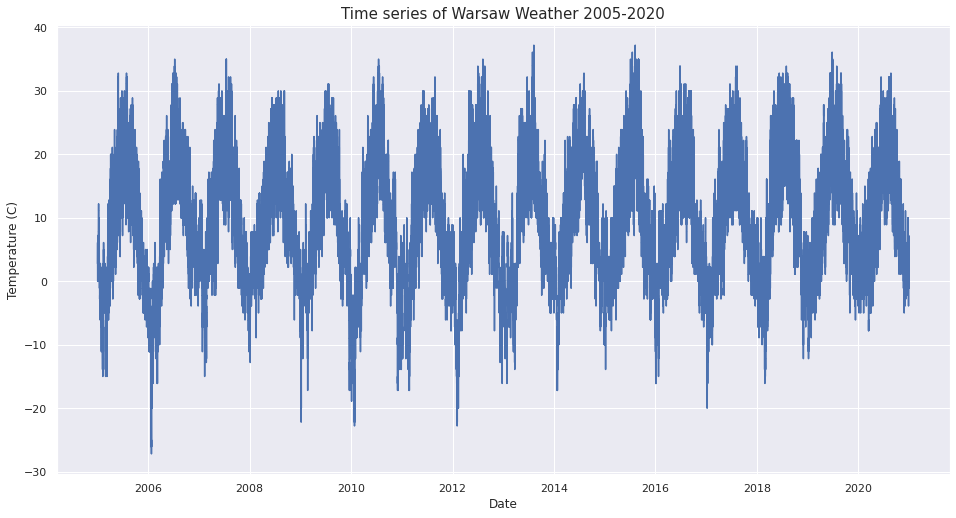

In [11]:
%matplotlib inline

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(16, 8.27)
g = sns.lineplot(x=df.index, y='Temperature (C)', data=df)
g.set_title('Time series of Warsaw Weather 2005-2020', fontsize=15)





In [12]:
df = df.reset_index()
month_avg = df.groupby([df['Date'].dt.year,df['Date'].dt.month]).mean()




<AxesSubplot:xlabel='Date,Date'>

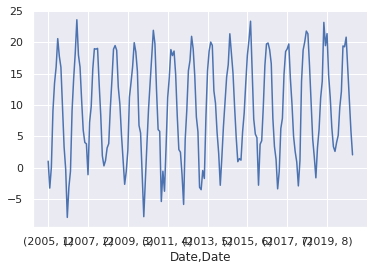

In [13]:
month_avg['Temperature (C)'].plot()

In [14]:
df.groupby([df['Date'].dt.year])[['Temperature (C)']].max()

,Temperature (C)
Date,
2005,32.8
2006,35.0
2007,35.0
2008,30.0
2009,31.1
2010,35.0
2011,32.2
2012,35.0
2013,37.2


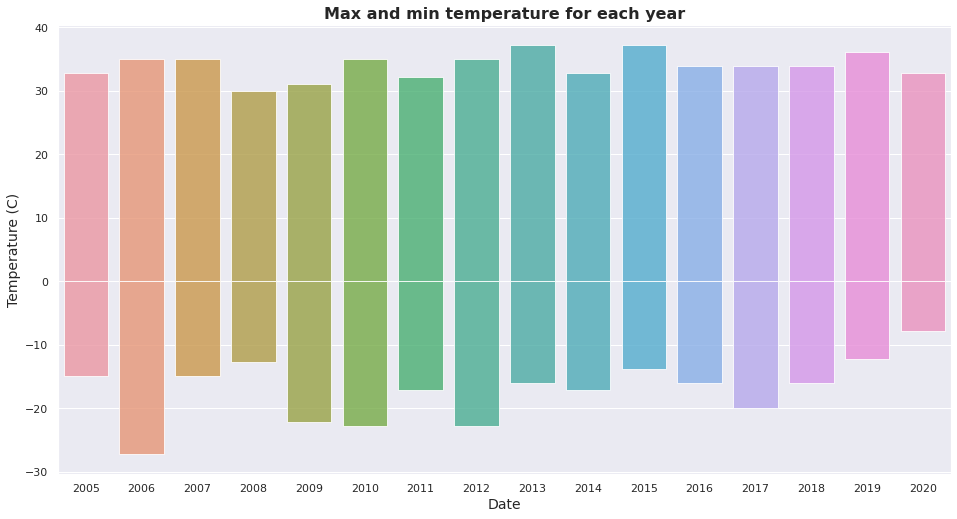

In [15]:
temp_max=df.groupby([df['Date'].dt.year])[['Temperature (C)']].max()
temp_min=df.groupby([df['Date'].dt.year])[['Temperature (C)']].min()

fig, ax = plt.subplots()
fig.set_size_inches(16, 8.27)
sns.set_style('whitegrid')

sns.barplot(x=temp_max.index, y='Temperature (C)', data=temp_max, alpha=0.8)
sns.barplot(x=temp_min.index, y='Temperature (C)', data=temp_min, alpha=0.8)


ax.set_title('Max and min temperature for each year', fontweight='bold', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Temperature (C)', fontsize=14)
plt.show()

In [16]:
df['Condition'].value_counts().head(10)



Fair                     149836
Mostly Cloudy             77989
Partly Cloudy             22792
Light Rain                 6653
Mist                       5079
Cloudy                     2977
Light Rain Shower          2264
Mostly Cloudy / Windy      1852
Light Snow                 1849
Shallow Fog                1535
Name: Condition, dtype: int64

In [17]:
df.head()

,Date,Temperature (C),Dew Point (C),Humidity (%),Wind,Wind Speed (kmh),Pressure (hPa),Condition
0,2005-01-01 00:00:00,2.8,2.8,100,SW,3.7,1005.1,Mostly Cloudy
1,2005-01-01 00:30:00,2.8,2.8,100,SW,3.7,1005.1,Mostly Cloudy
2,2005-01-01 01:00:00,2.8,2.8,100,SW,4.3,1005.1,Mostly Cloudy
3,2005-01-01 01:30:00,3.9,2.8,93,SW,3.7,1005.1,Mostly Cloudy
4,2005-01-01 02:00:00,3.9,2.8,93,SW,5.0,1005.1,Mostly Cloudy


In [39]:
df = df.set_index('Date')

In [52]:
df['Temperature (C)'].mean()

9.586935156424119

In [53]:
df['Temperature (C)'].std()

9.161165385695597